In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


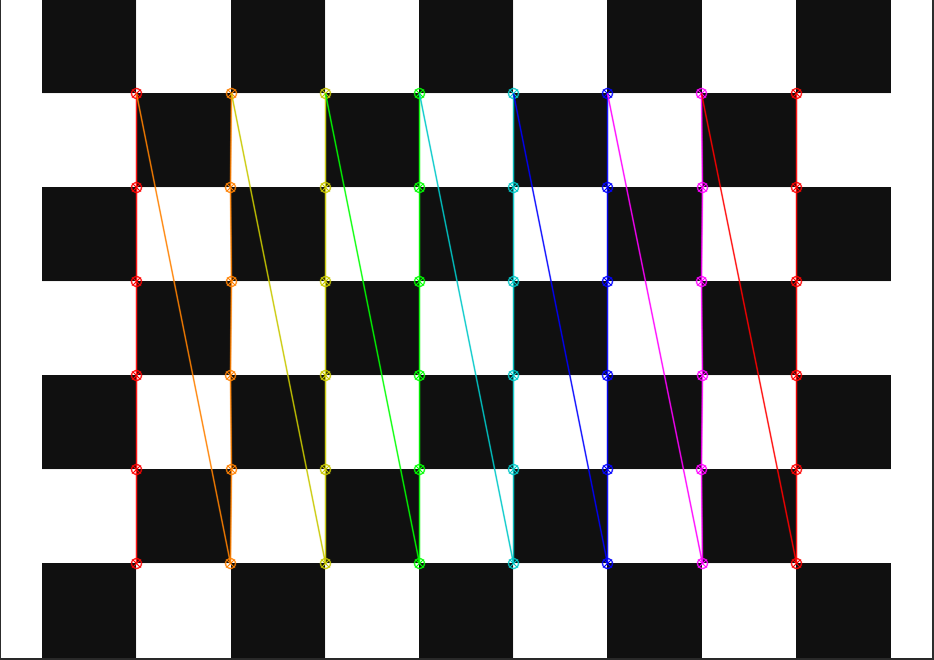

Matrix:
[[1.17593669e+04 0.00000000e+00 4.26331449e+02]
 [0.00000000e+00 1.17385147e+04 3.27462115e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coeff:
[[ 6.86654118e+00 -3.48056971e+03  4.67129146e-05  1.32188359e-02
  -6.33726102e+00]]

 Rotation Vectors:
(array([[ 0.02050201],
       [-0.020357  ],
       [-1.57070077]]),)

 Translation:
(array([[ -3.08124445],
       [  2.50057616],
       [125.12686465]]),)


In [ ]:
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow
  

CHECKERBOARD = (6, 8)
  
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
threedpoints = []
twodpoints = []
objectp3d = np.zeros((1, CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
  
images = glob.glob('/content/Checkerboard.PNG')
  
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD, 
                    cv2.CALIB_CB_ADAPTIVE_THRESH 
                    + cv2.CALIB_CB_FAST_CHECK + 
                    cv2.CALIB_CB_NORMALIZE_IMAGE)
  
    
    if ret == True:
        threedpoints.append(objectp3d)
  
       
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
  
        twodpoints.append(corners2)
  
        image = cv2.drawChessboardCorners(image, 
                                          CHECKERBOARD, 
                                          corners2, ret)
  
    cv2_imshow(image)
    cv2.waitKey(0)
  
cv2.destroyAllWindows()
  
h, w = image.shape[:2]
  
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None)
  
  

print("Matrix:")
print(matrix)
  
print("\n Distortion coeff:")
print(distortion)
  
print("\n Rotation Vectors:")
print(r_vecs)
  
print("\n Translation:")
print(t_vecs)